학번 : 2019250059




이름 : 한민욱

In [161]:
#cd /content/drive/MyDrive/Practice/Artificial_Intelligence

In [162]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

#Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)
  # Python 환경에서 Scikit-Learn을 사용하여프로젝트를 수행할 때 필요한 설정을 포함하고 있습니다. 주요 머신 러닝 라이브러리인 Scikit-Learn을 활용하여 프로젝트를 진행할 때 필요한 환경 설정과 이미지 저장을 위한 함수를 정의하고 있습니다.

In [163]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path. join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
  #인터넷에서 주택 데이터셋을 다운로드하고 압축을 해제하여 지정된 경로에 저장하는 함수를 정의합니다. 함수는 주택 데이터셋의 URL을 받아서 해당 URL에서 데이터를 다운로드하고, 압축을 해제한 후에 주어진 경로에 저장합니다.

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
fetch_housing_data()

In [166]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)
  #주택 데이터셋을 불러오는 함수를 정의합니다. 함수는 저장된 CSV 파일을 읽어와서 Pandas DataFrame으로 반환합니다.

In [167]:
housing = load_housing_data()
print("2019250059 한민욱")
housing.head()

2019250059 한민욱


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [168]:
housing.info()
print("2019250059 한민욱")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
2019250059 한민욱


In [169]:
housing["ocean_proximity"].value_counts()
print("2019250059 한민욱")

2019250059 한민욱


In [170]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots
2019250059 한민욱


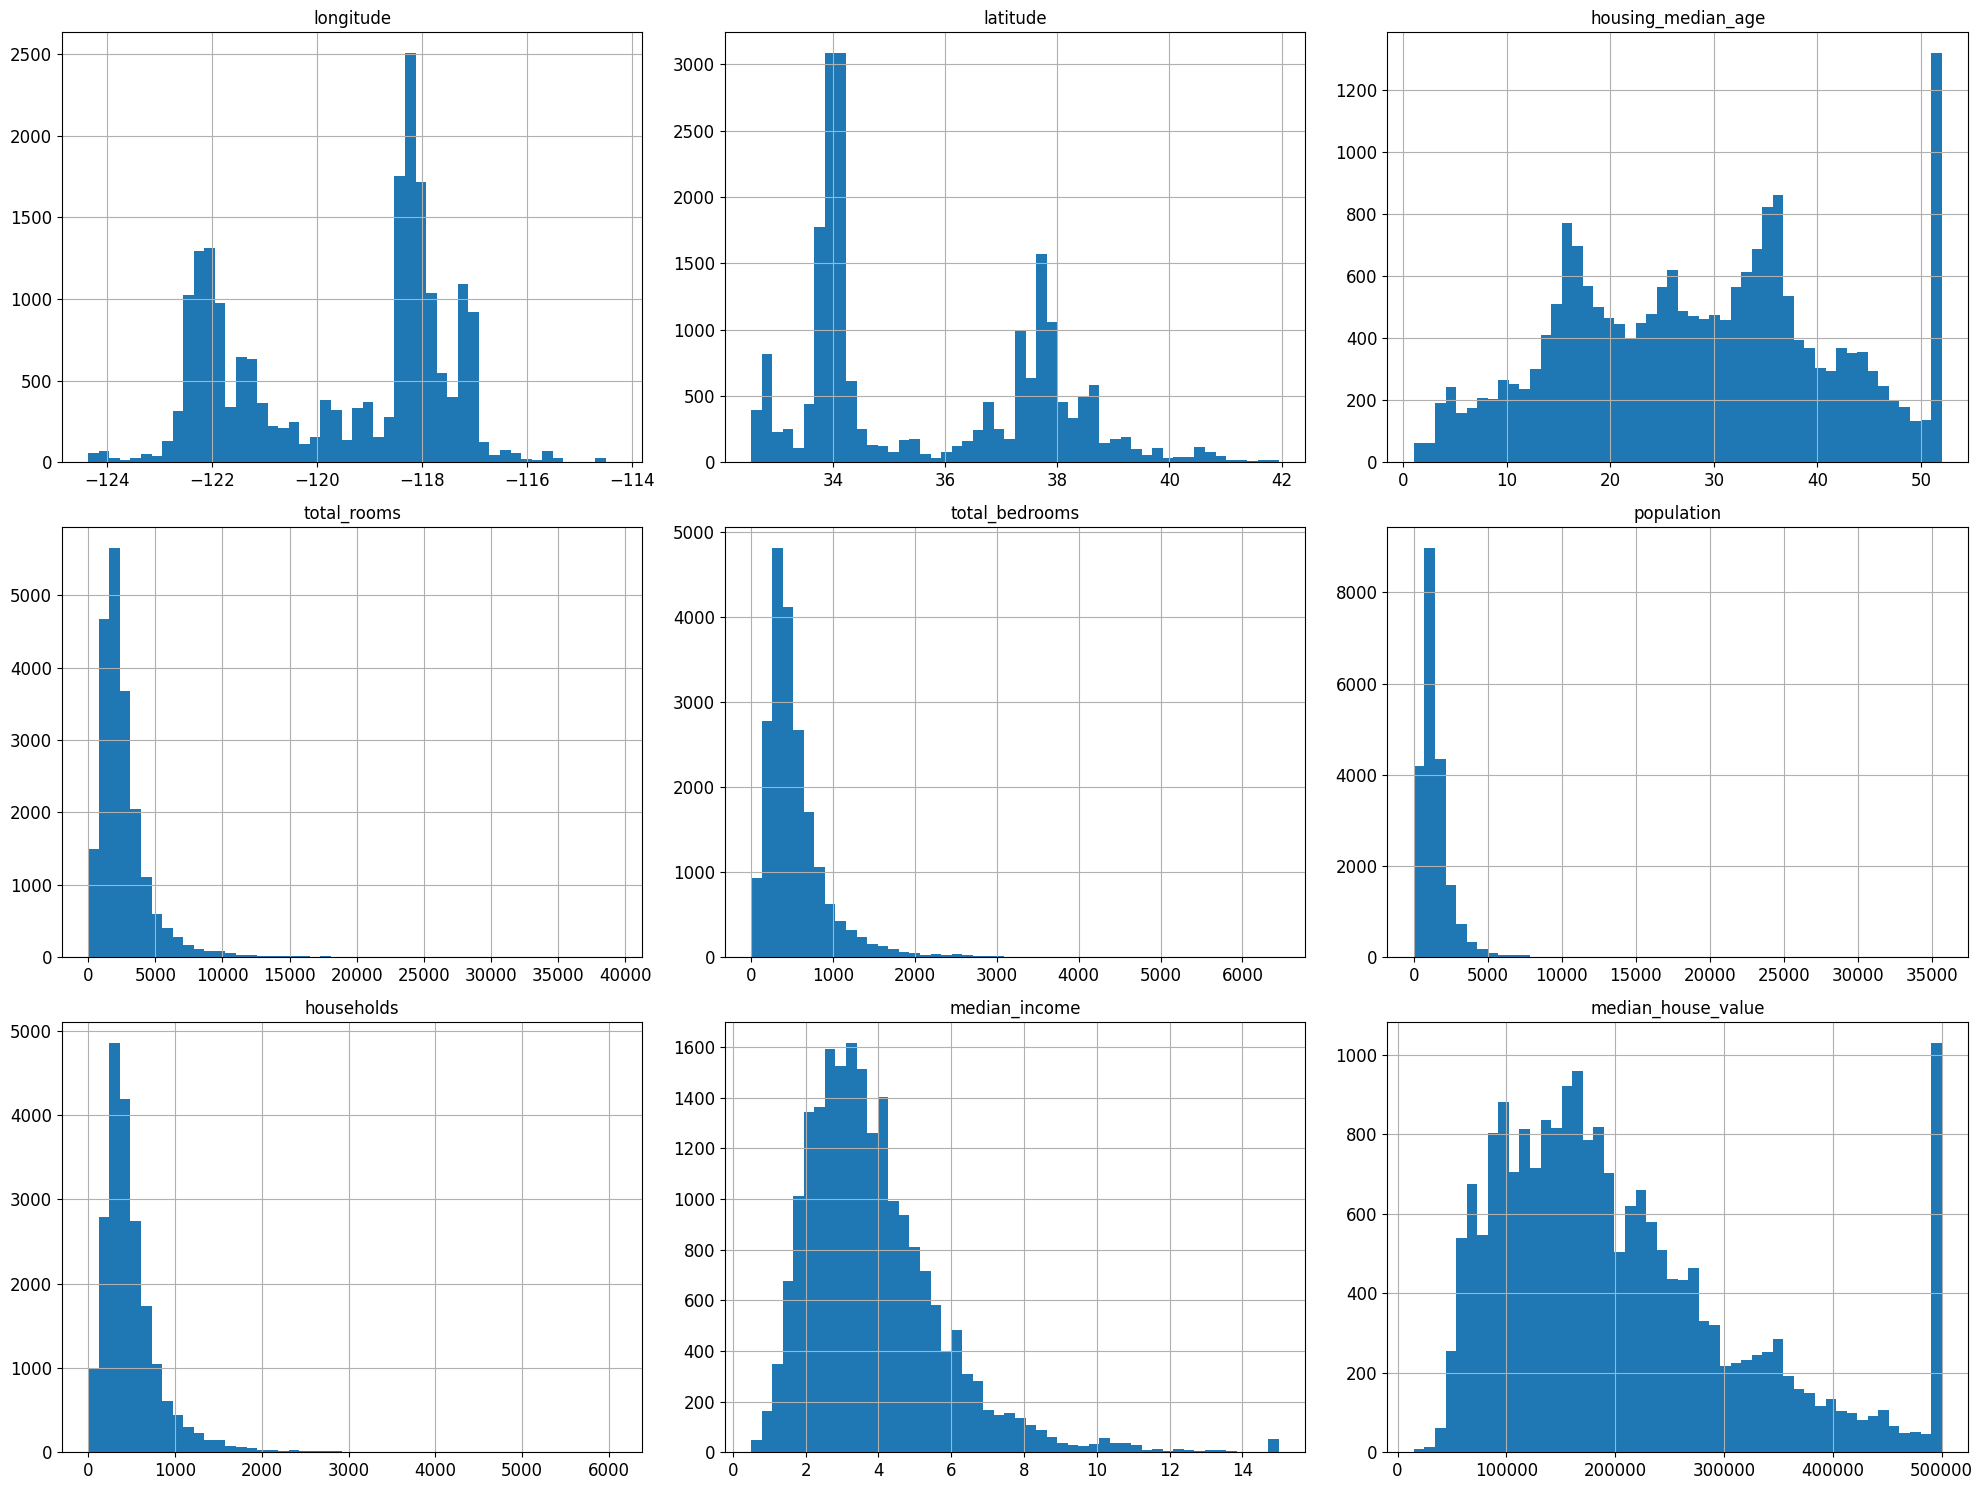

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
print("2019250059 한민욱")
plt.show()
#주택 데이터셋의 히스토그램을 그리고 저장하는 작업을 수행합니다. 먼저 %matplotlib inline 명령어를 사용하여 matplotlib 그래프를 주피터 노트북 안에서 표시하도록 설정합니다. 그런 다음 matplotlib의 hist 함수를 사용하여 주택 데이터셋의 히스토그램을 그립니다.


In [172]:
np.random.seed(42)

In [173]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
  shuffled_indices = np. random.permutation(len(data))
  test_set_size = int(len(data) + test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]
  #데이터셋을 훈련 세트와 테스트 세트로 나누는 함수를 정의합니다. 이 함수는 데이터와 테스트 세트의 비율을 인자로 받아서 데이터를 섞은 후에 해당 비율에 따라 훈련 세트와 테스트 세트로 나눕니다.

In [174]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

0

In [175]:
len(test_set)

20640

In [176]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data. loc[in_test_set]
  #고유 식별자를 기반으로 데이터를 테스트 세트와 훈련 세트로 분할하는 코드입니다.

In [177]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
  return hash(np.int64(identifier)).digest ()[-1] < 256 + test_ratio
  #데이터셋에서 특정 데이터의 테스트 세트 여부를 확인하기 위한 함수를 정의합니다. 주어진 identifier에 대해 해시 함수(hashlib.md5)를 사용하여 해시를 생성하고, 그 해시의 마지막 바이트 값이 테스트 비율보다 작은지 확인합니다.

In [178]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
  return bytearray(hash(np.int64(identifier)).digest ())[-1] < 256 + test_ratio

In [179]:
housing_with_id = housing. reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [180]:
housing_with_id["id"] = housing["longitude"] + 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [181]:
test_set.head()
print("2019250059 한민욱")

2019250059 한민욱


In [182]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [183]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


2019250059 한민욱


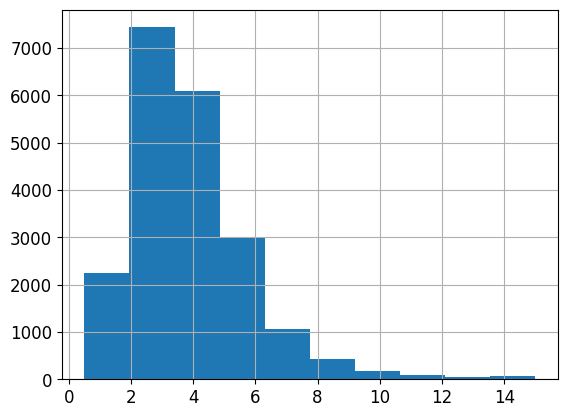

In [184]:
housing["median_income"].hist()
print("2019250059 한민욱")

In [185]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

In [186]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

2019250059 한민욱


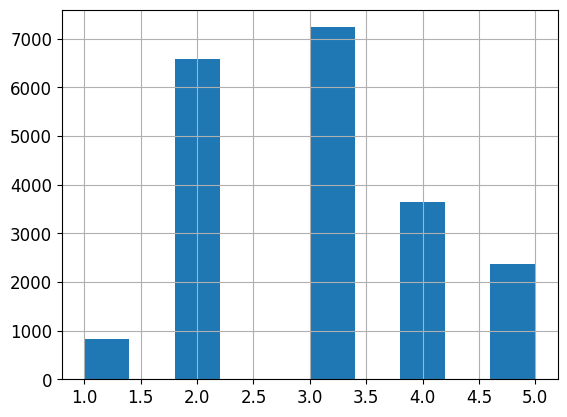

In [187]:
housing["income_cat"].hist()
print("2019250059 한민욱")
# train_test_split() 함수는 파이썬 리스트, 넘파이 배열, 판다스 데이터프레임과 판다스 시리즈 객체 등을 입력으로 받을 수 있다.
#지금까지는 순수한 무작위 샘플링 방식을 보았는데 데이터셋이 특성 수에 비해 충분히 크지 않다면 샘플링 편향이 생길 가능성이 크다. 예를들어 설문조사 남 여 비율이 4:6 이라면 무작위로 뽑은 표본에서도 남 여 비율이 4:6을 유지해야 한다. 이를 계층적 샘플링(stratified sampling) 이라고 한다.
#위 데이터에서 중간 소득이 중간 주택 가격을 예측하는 데 매우 중요하다고 이야기해주었다고 가정하자. 이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다. 중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다.

In [188]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  # 이제 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었다. 사이킷런의 Stratified ShuffleSplit를 사용할 수 있다.

In [189]:
strat_test_set ["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [190]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [191]:
def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd. DataFrame({
  "Overall": income_cat_proportions(housing),
  "Stratified": income_cat_proportions(strat_test_set),
  "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand, %error"] = 100 + compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat, %error"] = 100 + compare_props["Stratified"] / compare_props["Overall"] - 100
#income_cat_proportions 함수는 데이터의 "income_cat" 열에서 각 카테고리의 비율을 계산합니다.
#train_test_split 함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 분할합니다.

In [192]:
compare_props

,Overall,Stratified,Random,"Rand, %error","Strat, %error"
1,0.039826,0.039971,0.040213,1.009732,1.003650
2,0.318847,0.318798,0.324370,1.017323,0.999848
3,0.350581,0.350533,0.358527,1.022664,0.999862
4,0.176308,0.176357,0.167393,0.949437,1.000275
5,0.114438,0.114341,0.109496,0.956816,0.999153


In [193]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)
  #이 코드는 strat_train_set과 strat_test_set 데이터셋에서 "income_cat" 열을 삭제하는 작업을 수행합니다.

In [194]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot
2019250059 한민욱


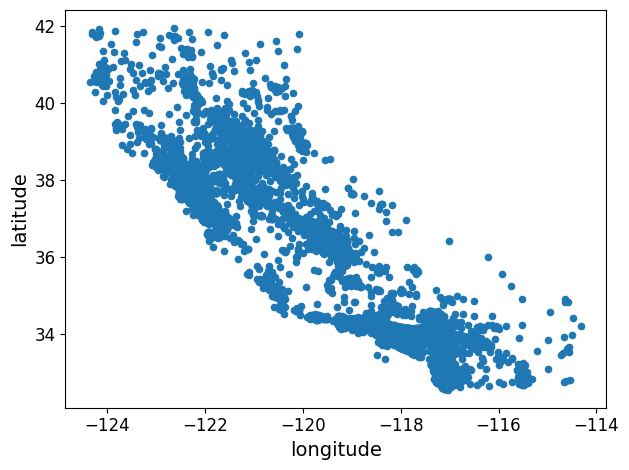

In [195]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")
print("2019250059 한민욱")

Saving figure better_visualization_plot
2019250059 한민욱


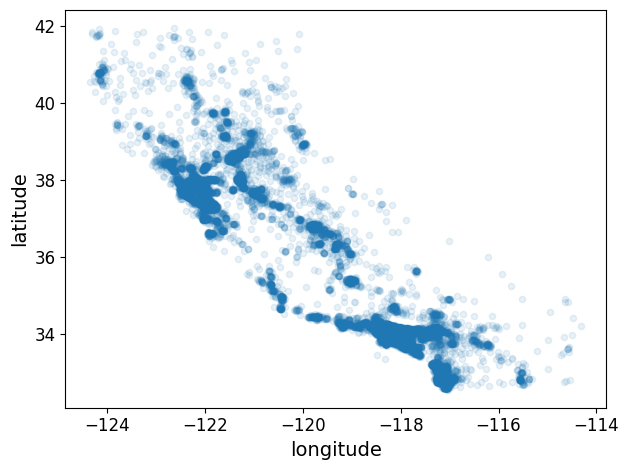

In [196]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")
print("2019250059 한민욱")
# housing 데이터프레임에서 "longitude"와 "latitude" 열을 사용하여 산점도를 그리는 작업을 수행합니다.

Saving figure housing_prices_scatterplot
2019250059 한민욱


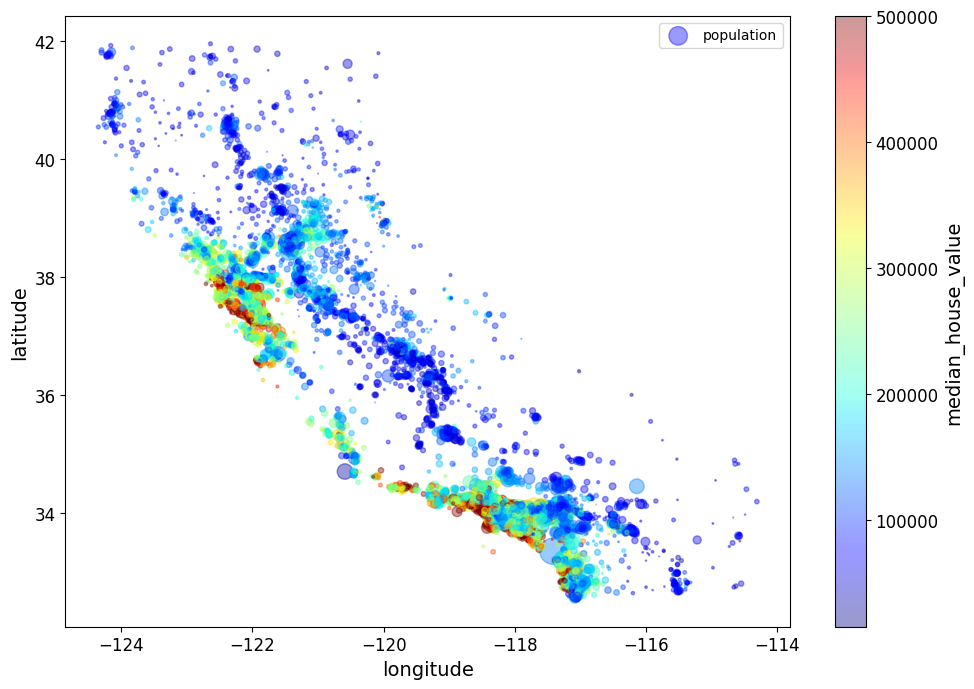

In [197]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s=housing["population"]/100, label="population", figsize=(10,7),
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
              sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")
print("2019250059 한민욱")
#주어진 코드는 주택 데이터셋에서 "longitude"와 "latitude"를 x축과 y축으로 하여 산점도를 그리는 작업을 수행합니다.

In [198]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print ("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
print("2019250059 한민욱")
#이미지 파일인 "california.png"을 GitHub 저장소에서 다운로드하여 로컬 시스템의 디렉토리에 저장하는 코드입니다.

2019250059 한민욱


In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot (kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                    s=housing['population']/100, label="Population",
                    c="median_house_value", cmap=plt.get_cmap("jet"),
                    colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113,80, 32,45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel ("Latitude", fontsize=14)
plt.xlabel ("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt. legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()
print("2019250059 한민욱")
#matplotlib를 사용하여 캘리포니아 지역의 주택 가격을 시각화하는 코드입니다.
#matplotlib.image 모듈을 mpimg로 가져옵니다.
##이미지 파일을 mpimg.imread() 함수를 사용하여 읽어옵니다.
#housing 데이터프레임을 사용하여 산점도를 그립니다. x축은 경도(longitude), y축은 위도(latitude)로 설정하고, 점의 크기는 인구수(population)에 비례하게, 색상은 중간 주택 가격(median_house_value)에 따라 매핑합니다.
#plt.imshow() 함수를 사용하여 캘리포니아 지도 이미지를 추가하고, 이미지의 범위와 투명도를 설정합니다.
#x축과 y축의 라벨을 추가하고, 컬러바를 설정하여 중간 주택 가격의 범위를 표시합니다.
#그래프를 저장하고 출력합니다.3

Saving figure california_housing_prices_plot


In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("scatter_matrix_plot")
print("2019250059 한민욱")
#pandas의 scatter_matrix() 함수를 사용하여 다양한 변수들 간의 산점도 행렬을 그리는 것입니다.

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")
print("2019250059 한민욱")
#housing 데이터 프레임에 있는 median_income을 x축으로, median_house_value를 y축으로 하는 산점도를 그리고 있습니다. alpha=0.1은 점의 투명도를 조절하는 매개변수입니다. 이어서 plt.axis([0, 16, 0, 550000])는 x축과 y축의 범위를 설정하는 부분입니다.